In [14]:
from pandas import to_datetime, DataFrame, Series
from os import path
from ehyd_tools.data_processing import data_validation, data_availability, max_10a, check_period, rain_figure, create_statistics
from ehyd_tools.in_out import get_series, import_series, export_series, csv_args, get_station_meta, ehyd_stations
from ehyd_tools.sww_utils import span_table

In [3]:
Series(ehyd_stations).rename(index='id').rename('Station').to_frame()

,Station
100180,Tschagguns
100370,Thüringen
100446,Lustenau
100479,Dornbirn
100776,Bregenz
101303,Leutasch-Kirchplatzl
101816,Ladis-Neuegg
102772,Kelchsau
103143,St. Johann in Tirol-Almdorf
103895,Eugendorf


In [4]:
id_number = 112086

In [5]:
series = get_series(id_number)

You choose the station: "Graz-Andritz" with the id: "112086".


In [5]:
series = import_series('ehyd_{}.parquet'.format(id_number))

In [ ]:
print(get_station_meta(id_number))

In [6]:
series.head(), series.tail()

(datetime
 2007-09-17 13:56:00    0.0
 2007-09-17 13:57:00    0.0
 2007-09-17 13:58:00    0.0
 2007-09-17 13:59:00    0.0
 2007-09-17 14:00:00    0.0
 Freq: T, Name: precipitation, dtype: float64,
 datetime
 2016-12-31 23:56:00    0.0
 2016-12-31 23:57:00    0.0
 2016-12-31 23:58:00    0.0
 2016-12-31 23:59:00    0.0
 2017-01-01 00:00:00    NaN
 Freq: T, Name: precipitation, dtype: float64)

In [7]:
export_series(series, filename='ehyd_{}'.format(id_number), save_as='csv', unix=False)

'ehyd_112086.csv'

In [8]:
export_series(series, filename='ehyd_{}'.format(id_number), save_as='parquet')

'ehyd_112086.parquet'

In [9]:
tags = data_validation(series)
availability = data_availability(tags)
availability

2007-01-01 00:00:00    False
2007-01-01 00:01:00    False
2007-01-01 00:02:00    False
2007-01-01 00:03:00    False
2007-01-01 00:04:00    False
                       ...  
2017-12-31 23:55:00    False
2017-12-31 23:56:00    False
2017-12-31 23:57:00    False
2017-12-31 23:58:00    False
2017-12-31 23:59:00    False
Freq: T, Length: 5785920, dtype: bool

In [10]:
max_10a(availability)

(Timestamp('2007-09-17 01:55:00'),
 Timestamp('2017-09-17 01:55:00', freq='-1T'))

In [11]:
span_table(~availability)

,start,end
0,2007-01-01,2007-09-17 13:55:00
1,2017-01-01,2017-12-31 23:59:00


In [20]:
availability_cut = 0.9
stats = create_statistics(series, availability, availability_cut=availability_cut)

In [17]:
stats

{'maximum': (1189.2449999991084,
  Timestamp('2009-12-31 00:00:00', freq='A-DEC'),
  1.0),
 'minimum': (566.2639999999434,
  Timestamp('2011-12-31 00:00:00', freq='A-DEC'),
  1.0),
 'mean': (871.1262222220123, 0.8444382177943822)}

In [21]:
rain_fmt = '{:0.0f} mm'
date_fmt = '{:%Y}'
avail_fmt = '{:0.0%}'

print(
    'The annual totals of the data series serve as the data basis.\n'
    'The following statistics were analyzed:\n'
    'Only years with a availability of {avail} will be evaluated.\n'
    '\n'
    'The maximum is {rain} and was in the year {date} (with {avail} Data available).\n'
    'The minimum is {rain} and was in the year {date} (with {avail} Data available).\n'
    'The mean is {rain} (with {avail} Data available in average).'
    ''.format(rain=rain_fmt, date=date_fmt, avail=avail_fmt).format(availability_cut,
                                                                    *stats['maximum'],
                                                                    *stats['minimum'],
                                                                    *stats['mean']))

The annual totals of the data series serve as the data basis.
The following statistics were analyzed:
Only years with a availability of 90% will be evaluated.

The maximum is 1189 mm and was in the year 2009 (with 100% Data available).
The minimum is 566 mm and was in the year 2011 (with 100% Data available).
The mean is 871 mm (with 84% Data available in average).


(<Figure size 841.89x595.276 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1fa0a3fe970>)

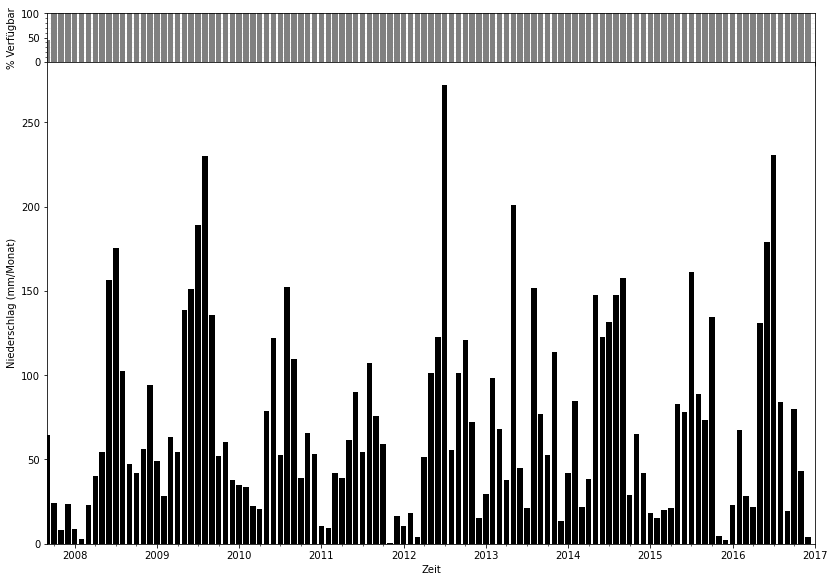

In [15]:
rain_figure(series, availability)